In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [4]:
from TargetDistributions.DoubleWell import ManyWellEnergy
from FittedModels.utils.plotting_utils import plot_samples_vs_contours_many_well

In [15]:
from FittedModels.Models.FlowModel import FlowModel
from AIS_train.train_AIS import AIS_trainer
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils.plotting_utils import plot_history, plot_distributions, plot_samples

import matplotlib.pyplot as plt
import torch
from Utils.plotting_utils import plot_func2D, plot_distribution
from Utils.numerical_utils import MC_estimate_true_expectation
from Utils.numerical_utils import quadratic_function as expectation_function
torch.set_default_dtype(torch.float64)

def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours_many_well(*args, **kwargs)
    plt.show()

In [16]:
dim = 6
target = ManyWellEnergy(dim=dim, a=-0.5, b=-6)

In [17]:
n_samples_expectation = int(1e4)
n_samples=int(1e4)

In [18]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=20, n_steps_transition_operator=3,
                    step_size=0.5, transition_operator="HMC", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-3)

# Visualisation

## Vanilla IS with the flow

In [19]:
vanilla_IS = VanillaImportanceSampling(sampling_distribution=learnt_sampler, target_distribution=target)
expectation_vanilla, info_dict_vanilla = \
vanilla_IS.calculate_expectation(n_samples_expectation, expectation_function=expectation_function)
print(f"ESS is {info_dict_vanilla['effective_sample_size']/n_samples_expectation}, \
      var is {torch.var(info_dict_vanilla['normalised_sampling_weights'])}")

ESS is 0.0016460871866202016,       var is 6.065618918663919e-06


## Hamiltonian HMC

In [20]:
expectation_before, info_dict_before = tester.AIS_train.calculate_expectation(n_samples_expectation,
                                                                    expectation_function=expectation_function)
print(info_dict_before['effective_sample_size'].item() / n_samples_expectation)

0.029691830061194673


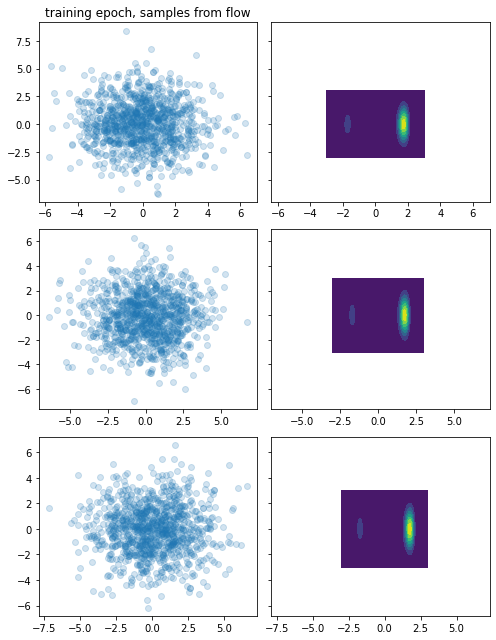

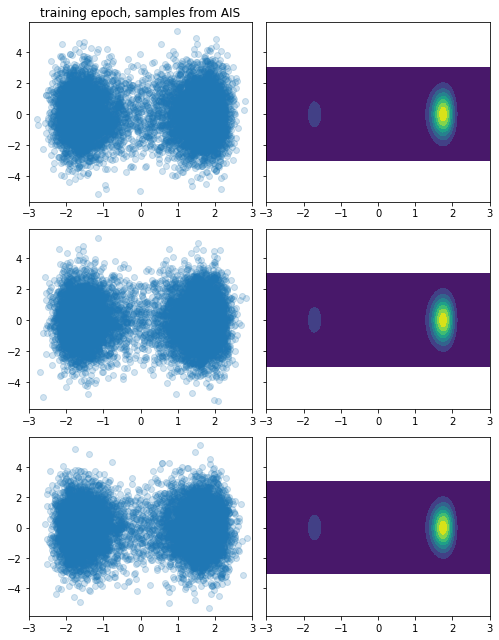

In [21]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])

# Train

In [22]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=20, n_steps_transition_operator=3,
                    step_size=0.5, transition_operator="HMC", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-4)

  0%|          | 0/1000 [00:00<?, ?it/s]

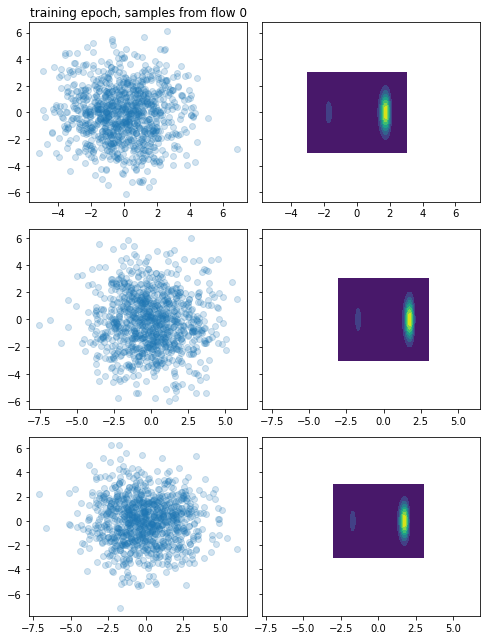

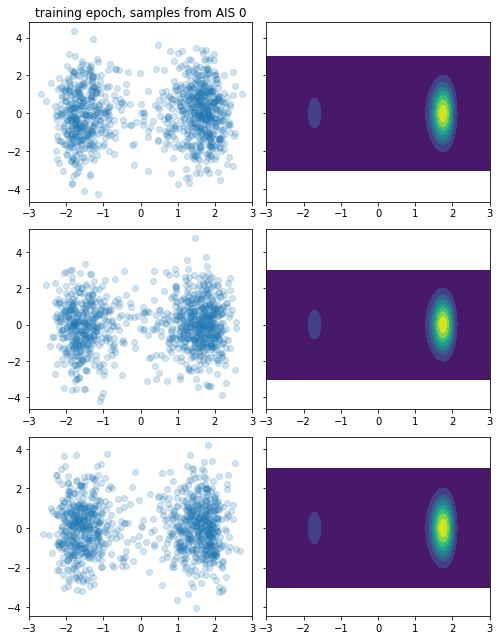

loss: -20.92121546107342,   log_p_x_post_AIS 21.416611041623447, ESS 0.149957089404854:  25%|██▌       | 250/1000 [1:31:10<4:32:50, 21.83s/it]   

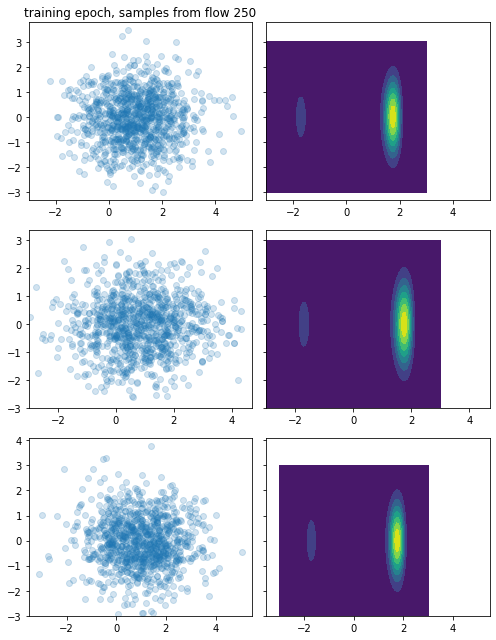

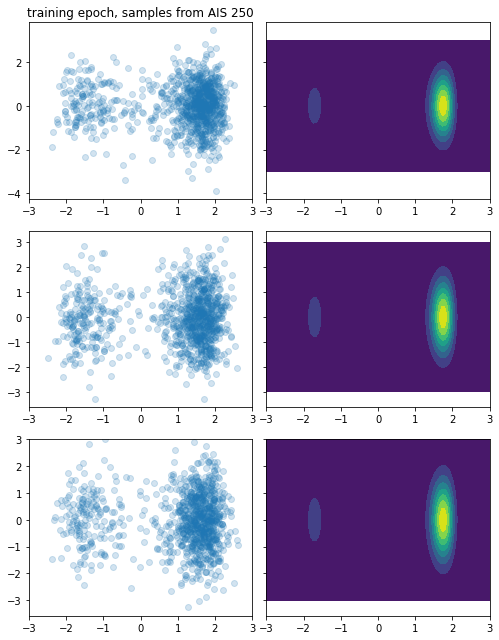

loss: -10.915510891731834,   log_p_x_post_AIS 22.278375190276556, ESS 0.1150444087420615:  50%|█████     | 500/1000 [2:57:29<2:48:25, 20.21s/it] 

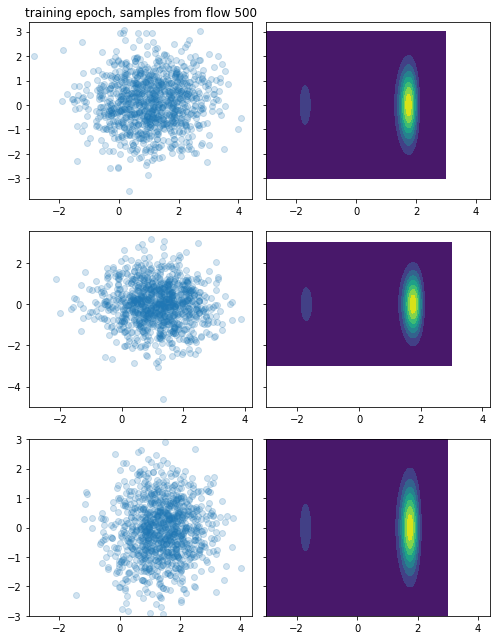

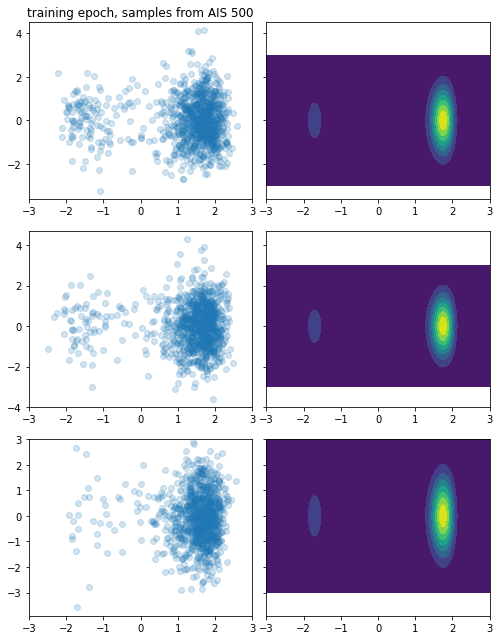

loss: -15.244010384544458,   log_p_x_post_AIS 24.28205099410716, ESS 0.33081169366373087:  69%|██████▉   | 694/1000 [4:03:24<1:24:15, 16.52s/it] 

The value argument must be within the support


loss: -15.244010384544458,   log_p_x_post_AIS 24.28205099410716, ESS 0.33081169366373087:  70%|██████▉   | 695/1000 [4:03:34<1:14:01, 14.56s/it]

The value argument must be within the support


loss: -1.7046795899675764,   log_p_x_post_AIS 24.345303820239614, ESS 0.27226266122911535:  71%|███████   | 706/1000 [4:07:01<1:20:22, 16.40s/it]

The value argument must be within the support


loss: -1.7046795899675764,   log_p_x_post_AIS 24.345303820239614, ESS 0.27226266122911535:  71%|███████   | 707/1000 [4:07:06<1:02:44, 12.85s/it]

The value argument must be within the support


loss: -1.7046795899675764,   log_p_x_post_AIS 24.345303820239614, ESS 0.27226266122911535:  71%|███████   | 711/1000 [4:08:08<1:02:57, 13.07s/it]

The value argument must be within the support


loss: -1.7046795899675764,   log_p_x_post_AIS 24.345303820239614, ESS 0.27226266122911535:  71%|███████▏  | 713/1000 [4:08:32<56:02, 11.71s/it]  

The value argument must be within the support


loss: -1.7046795899675764,   log_p_x_post_AIS 24.345303820239614, ESS 0.27226266122911535:  72%|███████▏  | 716/1000 [4:09:12<53:29, 11.30s/it]  

The value argument must be within the support


loss: -1.7046795899675764,   log_p_x_post_AIS 24.345303820239614, ESS 0.27226266122911535:  72%|███████▏  | 717/1000 [4:09:23<52:53, 11.21s/it]

The value argument must be within the support


loss: -1.7046795899675764,   log_p_x_post_AIS 24.345303820239614, ESS 0.27226266122911535:  72%|███████▏  | 720/1000 [4:10:19<1:14:18, 15.92s/it]

The value argument must be within the support


loss: -18.604926536291295,   log_p_x_post_AIS 24.400259972730726, ESS 0.3871261740801604:  72%|███████▎  | 725/1000 [4:11:55<1:18:11, 17.06s/it] 

The value argument must be within the support


loss: -18.604926536291295,   log_p_x_post_AIS 24.400259972730726, ESS 0.3871261740801604:  73%|███████▎  | 729/1000 [4:13:01<1:04:51, 14.36s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  73%|███████▎  | 732/1000 [4:14:02<1:20:39, 18.06s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  73%|███████▎  | 733/1000 [4:14:15<1:13:18, 16.47s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  73%|███████▎  | 734/1000 [4:14:31<1:13:00, 16.47s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  74%|███████▍  | 738/1000 [4:15:38<1:04:11, 14.70s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  74%|███████▍  | 739/1000 [4:15:38<45:12, 10.39s/it]  

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  74%|███████▍  | 741/1000 [4:16:06<49:37, 11.50s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  74%|███████▍  | 743/1000 [4:16:46<1:06:51, 15.61s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  74%|███████▍  | 745/1000 [4:17:11<56:08, 13.21s/it]  

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  75%|███████▍  | 746/1000 [4:17:11<39:37,  9.36s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  75%|███████▍  | 747/1000 [4:17:15<32:08,  7.62s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  75%|███████▍  | 749/1000 [4:17:40<39:00,  9.32s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  75%|███████▌  | 750/1000 [4:17:42<30:27,  7.31s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  75%|███████▌  | 751/1000 [4:17:49<29:00,  6.99s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  75%|███████▌  | 752/1000 [4:17:51<22:44,  5.50s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  75%|███████▌  | 754/1000 [4:18:14<32:14,  7.87s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  76%|███████▌  | 755/1000 [4:18:22<32:08,  7.87s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  76%|███████▌  | 756/1000 [4:18:29<31:07,  7.65s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  76%|███████▌  | 757/1000 [4:18:35<29:07,  7.19s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  76%|███████▌  | 758/1000 [4:18:43<30:14,  7.50s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  76%|███████▌  | 760/1000 [4:19:12<41:34, 10.39s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  76%|███████▌  | 761/1000 [4:19:26<45:30, 11.42s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  76%|███████▌  | 762/1000 [4:19:41<49:33, 12.49s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  76%|███████▋  | 765/1000 [4:20:40<1:05:32, 16.73s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  77%|███████▋  | 767/1000 [4:21:05<54:02, 13.92s/it]  

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  77%|███████▋  | 768/1000 [4:21:18<52:27, 13.57s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  77%|███████▋  | 769/1000 [4:21:25<45:10, 11.73s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  77%|███████▋  | 770/1000 [4:21:29<36:03,  9.41s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  77%|███████▋  | 771/1000 [4:21:30<26:39,  6.99s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  77%|███████▋  | 772/1000 [4:21:31<19:19,  5.09s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  77%|███████▋  | 773/1000 [4:21:36<18:51,  4.98s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  77%|███████▋  | 774/1000 [4:21:40<17:45,  4.71s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 775/1000 [4:21:44<16:30,  4.40s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 776/1000 [4:21:44<11:55,  3.20s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 777/1000 [4:21:46<10:48,  2.91s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 778/1000 [4:21:48<09:06,  2.46s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 779/1000 [4:21:48<07:11,  1.95s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 781/1000 [4:22:22<33:03,  9.06s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 782/1000 [4:22:28<29:04,  8.00s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 783/1000 [4:22:28<20:40,  5.72s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 784/1000 [4:22:40<27:13,  7.56s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  78%|███████▊  | 785/1000 [4:22:41<20:07,  5.61s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  79%|███████▊  | 786/1000 [4:22:58<32:42,  9.17s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  79%|███████▊  | 787/1000 [4:23:11<36:34, 10.30s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  79%|███████▉  | 788/1000 [4:23:12<26:09,  7.40s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  79%|███████▉  | 789/1000 [4:23:20<26:56,  7.66s/it]

The value argument must be within the support


loss: -25.63131007226709,   log_p_x_post_AIS 24.564857606432536, ESS 0.46831853288261815:  79%|███████▉  | 790/1000 [4:23:29<27:32,  7.87s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  79%|███████▉  | 792/1000 [4:23:54<33:07,  9.56s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  79%|███████▉  | 793/1000 [4:24:00<29:31,  8.56s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  79%|███████▉  | 794/1000 [4:24:03<23:03,  6.72s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|███████▉  | 796/1000 [4:24:31<33:44,  9.92s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|███████▉  | 797/1000 [4:24:32<24:10,  7.15s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|███████▉  | 798/1000 [4:24:38<22:57,  6.82s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|███████▉  | 799/1000 [4:24:52<30:34,  9.13s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|████████  | 800/1000 [4:25:05<33:54, 10.17s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|████████  | 801/1000 [4:25:15<34:04, 10.27s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|████████  | 802/1000 [4:25:20<28:22,  8.60s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|████████  | 803/1000 [4:25:27<26:52,  8.19s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|████████  | 804/1000 [4:25:31<22:08,  6.78s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  80%|████████  | 805/1000 [4:25:33<17:21,  5.34s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  81%|████████  | 806/1000 [4:25:34<13:22,  4.14s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  81%|████████  | 807/1000 [4:25:45<19:14,  5.98s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  81%|████████  | 808/1000 [4:25:48<17:12,  5.38s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  81%|████████  | 809/1000 [4:25:55<18:07,  5.70s/it]

The value argument must be within the support


loss: -25.836782949217984,   log_p_x_post_AIS 24.669868004381733, ESS 0.49456470740598013:  81%|████████  | 810/1000 [4:26:00<17:10,  5.42s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  81%|████████  | 812/1000 [4:26:22<23:50,  7.61s/it]    

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  81%|████████▏ | 813/1000 [4:26:25<19:23,  6.22s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  81%|████████▏ | 814/1000 [4:26:26<13:49,  4.46s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  82%|████████▏ | 816/1000 [4:26:49<21:57,  7.16s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  82%|████████▏ | 817/1000 [4:26:50<16:14,  5.32s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  82%|████████▏ | 818/1000 [4:26:52<13:29,  4.45s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  82%|████████▏ | 821/1000 [4:27:36<28:37,  9.59s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  82%|████████▏ | 823/1000 [4:28:08<36:23, 12.34s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  82%|████████▏ | 824/1000 [4:28:14<30:56, 10.55s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  82%|████████▎ | 825/1000 [4:28:14<21:52,  7.50s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  83%|████████▎ | 826/1000 [4:28:25<24:10,  8.34s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  83%|████████▎ | 827/1000 [4:28:27<18:20,  6.36s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  83%|████████▎ | 828/1000 [4:28:32<17:04,  5.96s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  83%|████████▎ | 829/1000 [4:28:32<12:24,  4.36s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  83%|████████▎ | 830/1000 [4:28:40<14:57,  5.28s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  83%|████████▎ | 831/1000 [4:28:44<14:32,  5.16s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  83%|████████▎ | 832/1000 [4:28:58<21:07,  7.54s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  83%|████████▎ | 833/1000 [4:28:59<16:01,  5.76s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  83%|████████▎ | 834/1000 [4:29:04<15:09,  5.48s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  84%|████████▎ | 835/1000 [4:29:21<24:26,  8.89s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  84%|████████▎ | 836/1000 [4:29:27<21:46,  7.97s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  84%|████████▍ | 838/1000 [4:29:47<22:14,  8.24s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  84%|████████▍ | 840/1000 [4:30:14<27:48, 10.43s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  84%|████████▍ | 841/1000 [4:30:21<24:22,  9.20s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  84%|████████▍ | 842/1000 [4:30:22<17:30,  6.65s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  84%|████████▍ | 843/1000 [4:30:28<17:13,  6.58s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  84%|████████▍ | 844/1000 [4:30:30<13:41,  5.27s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  84%|████████▍ | 845/1000 [4:30:36<13:54,  5.38s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  85%|████████▍ | 848/1000 [4:31:19<24:14,  9.57s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  85%|████████▍ | 849/1000 [4:31:20<17:51,  7.09s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  85%|████████▌ | 850/1000 [4:31:23<14:21,  5.74s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  85%|████████▌ | 851/1000 [4:31:26<12:52,  5.18s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  85%|████████▌ | 852/1000 [4:31:29<10:51,  4.40s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  85%|████████▌ | 854/1000 [4:31:51<17:16,  7.10s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  86%|████████▌ | 855/1000 [4:31:52<12:41,  5.25s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  86%|████████▌ | 856/1000 [4:31:54<10:12,  4.25s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  86%|████████▌ | 857/1000 [4:32:05<14:33,  6.11s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  86%|████████▌ | 858/1000 [4:32:08<12:38,  5.34s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  86%|████████▌ | 859/1000 [4:32:11<10:36,  4.52s/it]

The value argument must be within the support


loss: -25.8559210070351,   log_p_x_post_AIS 24.70609874809218, ESS 0.5008131157724548:  86%|████████▌ | 860/1000 [4:32:11<07:35,  3.25s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  86%|████████▌ | 862/1000 [4:32:33<14:19,  6.23s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  86%|████████▋ | 863/1000 [4:32:37<12:37,  5.53s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  86%|████████▋ | 864/1000 [4:32:44<13:55,  6.14s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  86%|████████▋ | 865/1000 [4:32:45<10:33,  4.69s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  87%|████████▋ | 866/1000 [4:32:57<14:58,  6.71s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  87%|████████▋ | 867/1000 [4:32:58<11:01,  4.97s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  87%|████████▋ | 869/1000 [4:33:18<14:33,  6.67s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  87%|████████▋ | 870/1000 [4:33:34<20:22,  9.40s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  87%|████████▋ | 871/1000 [4:33:35<14:59,  6.97s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  87%|████████▋ | 872/1000 [4:33:39<12:50,  6.02s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  87%|████████▋ | 873/1000 [4:33:50<15:54,  7.52s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  87%|████████▋ | 874/1000 [4:33:58<16:19,  7.77s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 875/1000 [4:34:03<14:21,  6.89s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 877/1000 [4:34:25<16:59,  8.29s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 878/1000 [4:34:33<16:20,  8.04s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 879/1000 [4:34:39<15:24,  7.64s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 880/1000 [4:34:49<16:32,  8.27s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 881/1000 [4:35:06<21:34, 10.88s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 882/1000 [4:35:07<15:20,  7.80s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 883/1000 [4:35:08<11:34,  5.94s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 884/1000 [4:35:12<10:17,  5.32s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  88%|████████▊ | 885/1000 [4:35:16<09:19,  4.87s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  89%|████████▊ | 886/1000 [4:35:17<06:49,  3.59s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  89%|████████▉ | 888/1000 [4:35:38<11:59,  6.43s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  89%|████████▉ | 889/1000 [4:35:42<10:03,  5.44s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  89%|████████▉ | 890/1000 [4:35:52<12:48,  6.98s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  89%|████████▉ | 891/1000 [4:35:53<09:17,  5.11s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  89%|████████▉ | 893/1000 [4:36:29<20:11, 11.32s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  89%|████████▉ | 894/1000 [4:36:30<14:44,  8.34s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|████████▉ | 895/1000 [4:36:44<17:39, 10.09s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|████████▉ | 897/1000 [4:37:06<16:24,  9.56s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|████████▉ | 898/1000 [4:37:07<11:44,  6.91s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|████████▉ | 899/1000 [4:37:14<11:53,  7.06s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|█████████ | 900/1000 [4:37:19<10:35,  6.35s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|█████████ | 901/1000 [4:37:19<07:29,  4.54s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|█████████ | 902/1000 [4:37:21<06:03,  3.71s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|█████████ | 903/1000 [4:37:33<10:11,  6.30s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|█████████ | 904/1000 [4:37:38<09:13,  5.76s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  90%|█████████ | 905/1000 [4:37:54<14:02,  8.87s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  91%|█████████ | 906/1000 [4:37:56<10:45,  6.86s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  91%|█████████ | 907/1000 [4:37:57<07:36,  4.91s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  91%|█████████ | 908/1000 [4:38:01<07:07,  4.65s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  91%|█████████ | 909/1000 [4:38:10<09:06,  6.00s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  91%|█████████ | 910/1000 [4:38:11<06:38,  4.43s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  91%|█████████ | 911/1000 [4:38:15<06:33,  4.42s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  91%|█████████ | 912/1000 [4:38:19<06:31,  4.45s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  91%|█████████▏| 913/1000 [4:38:23<06:12,  4.28s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  91%|█████████▏| 914/1000 [4:38:25<05:02,  3.52s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▏| 915/1000 [4:38:26<03:48,  2.69s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▏| 916/1000 [4:38:27<03:14,  2.32s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▏| 917/1000 [4:38:33<04:44,  3.43s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▏| 918/1000 [4:38:34<03:26,  2.52s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▏| 919/1000 [4:38:36<03:14,  2.40s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▏| 920/1000 [4:38:45<05:53,  4.42s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▏| 921/1000 [4:38:47<04:45,  3.61s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▏| 922/1000 [4:38:47<03:24,  2.62s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▏| 923/1000 [4:38:53<04:41,  3.66s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  92%|█████████▎| 925/1000 [4:39:17<08:40,  6.94s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  93%|█████████▎| 927/1000 [4:39:44<11:38,  9.56s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  93%|█████████▎| 928/1000 [4:39:44<08:22,  6.97s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  93%|█████████▎| 929/1000 [4:39:58<10:42,  9.05s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  93%|█████████▎| 930/1000 [4:40:04<09:19,  7.99s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  93%|█████████▎| 931/1000 [4:40:14<09:53,  8.60s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  93%|█████████▎| 932/1000 [4:40:15<07:22,  6.50s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  93%|█████████▎| 933/1000 [4:40:30<09:53,  8.86s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  93%|█████████▎| 934/1000 [4:40:36<08:52,  8.07s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▎| 935/1000 [4:40:45<08:55,  8.24s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▎| 936/1000 [4:40:48<07:21,  6.90s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▎| 937/1000 [4:40:59<08:31,  8.11s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▍| 938/1000 [4:41:05<07:37,  7.38s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▍| 939/1000 [4:41:08<06:04,  5.97s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▍| 940/1000 [4:41:13<05:53,  5.89s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▍| 941/1000 [4:41:25<07:31,  7.65s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▍| 942/1000 [4:41:30<06:38,  6.88s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▍| 943/1000 [4:41:35<05:47,  6.09s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▍| 944/1000 [4:41:35<04:04,  4.36s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  94%|█████████▍| 945/1000 [4:41:38<03:35,  3.92s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  95%|█████████▍| 946/1000 [4:41:49<05:27,  6.07s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  95%|█████████▍| 947/1000 [4:41:52<04:38,  5.25s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  95%|█████████▍| 948/1000 [4:42:03<06:02,  6.97s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  95%|█████████▍| 949/1000 [4:42:04<04:28,  5.26s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  95%|█████████▌| 950/1000 [4:42:06<03:32,  4.25s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  95%|█████████▌| 951/1000 [4:42:16<04:47,  5.86s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  95%|█████████▌| 952/1000 [4:42:21<04:25,  5.54s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  95%|█████████▌| 953/1000 [4:42:21<03:06,  3.97s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  95%|█████████▌| 954/1000 [4:42:23<02:34,  3.36s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▌| 955/1000 [4:42:24<01:58,  2.63s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▌| 956/1000 [4:42:31<02:50,  3.87s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▌| 957/1000 [4:42:35<02:51,  3.98s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▌| 958/1000 [4:42:51<05:20,  7.63s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▌| 959/1000 [4:42:54<04:14,  6.21s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▌| 960/1000 [4:43:00<04:02,  6.07s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▌| 961/1000 [4:43:16<05:57,  9.16s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▌| 962/1000 [4:43:22<05:09,  8.15s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▋| 963/1000 [4:43:25<04:03,  6.57s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▋| 964/1000 [4:43:29<03:30,  5.86s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  96%|█████████▋| 965/1000 [4:43:30<02:30,  4.29s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  97%|█████████▋| 966/1000 [4:43:30<01:48,  3.20s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  97%|█████████▋| 967/1000 [4:43:38<02:27,  4.46s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  97%|█████████▋| 968/1000 [4:43:38<01:45,  3.31s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  97%|█████████▋| 969/1000 [4:43:39<01:20,  2.59s/it]

The value argument must be within the support


loss: -23.3650510890762,   log_p_x_post_AIS 24.81841438586829, ESS 0.5007106276429667:  97%|█████████▋| 970/1000 [4:43:40<01:02,  2.09s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  97%|█████████▋| 972/1000 [4:44:00<02:27,  5.26s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  97%|█████████▋| 973/1000 [4:44:01<01:46,  3.96s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  97%|█████████▋| 974/1000 [4:44:05<01:39,  3.83s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 975/1000 [4:44:06<01:14,  2.96s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 976/1000 [4:44:06<00:51,  2.16s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 977/1000 [4:44:19<02:05,  5.48s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 978/1000 [4:44:28<02:21,  6.43s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 979/1000 [4:44:31<01:53,  5.39s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 980/1000 [4:44:32<01:23,  4.18s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 981/1000 [4:44:42<01:49,  5.79s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 982/1000 [4:44:45<01:32,  5.17s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 983/1000 [4:44:46<01:03,  3.72s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 984/1000 [4:44:49<00:57,  3.61s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  98%|█████████▊| 985/1000 [4:44:52<00:49,  3.33s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  99%|█████████▊| 986/1000 [4:44:54<00:40,  2.92s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  99%|█████████▊| 987/1000 [4:45:04<01:07,  5.20s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  99%|█████████▉| 988/1000 [4:45:05<00:47,  3.94s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  99%|█████████▉| 989/1000 [4:45:09<00:41,  3.78s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  99%|█████████▉| 990/1000 [4:45:12<00:37,  3.75s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  99%|█████████▉| 991/1000 [4:45:15<00:30,  3.36s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  99%|█████████▉| 992/1000 [4:45:19<00:29,  3.63s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  99%|█████████▉| 993/1000 [4:45:26<00:32,  4.64s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861:  99%|█████████▉| 994/1000 [4:45:30<00:27,  4.61s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861: 100%|█████████▉| 995/1000 [4:45:35<00:22,  4.56s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861: 100%|█████████▉| 996/1000 [4:45:52<00:33,  8.34s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861: 100%|█████████▉| 997/1000 [4:45:56<00:21,  7.16s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861: 100%|█████████▉| 998/1000 [4:46:06<00:15,  7.88s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861: 100%|█████████▉| 999/1000 [4:46:13<00:07,  7.54s/it]

The value argument must be within the support


loss: -25.889876290483055,   log_p_x_post_AIS 24.853089908946806, ESS 0.5351383998880861: 100%|██████████| 1000/1000 [4:46:15<00:00, 17.18s/it]

The value argument must be within the support


In [23]:
history = tester.train(1000, batch_size=int(1e3), intermediate_plots=True, n_plots=4, plotting_func=plotter)

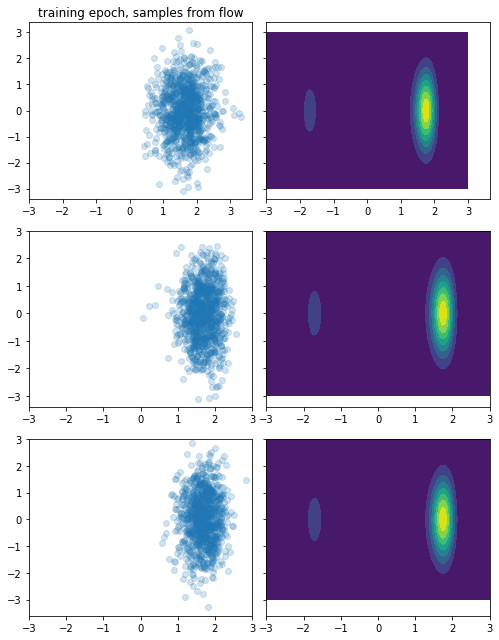

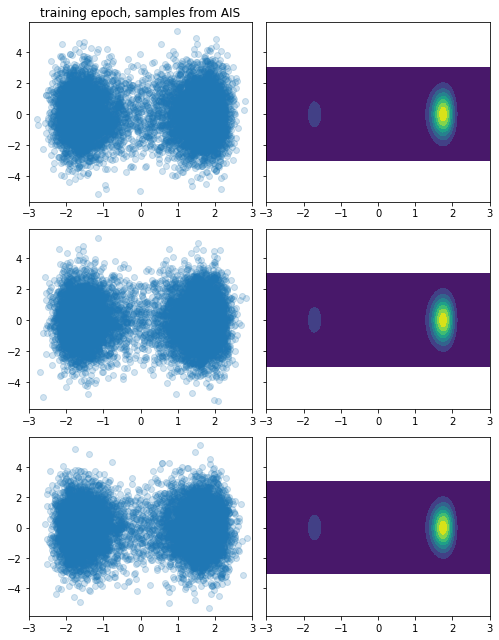

In [24]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])

In [27]:
expectation, info_dict = tester.AIS_train.calculate_expectation(n_samples_expectation,
                                                                    expectation_function=expectation_function)
print(info_dict['effective_sample_size'].item() / n_samples_expectation)

AssertionError: 

In [ ]:
plot_history(history)

# Metrpolis-Hastings

In [10]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=20, n_steps_transition_operator=3,
                    step_size=0.5, transition_operator="Metropolis", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-3)

In [11]:
expectation_before, info_dict_before = tester.AIS_train.calculate_expectation(n_samples_expectation,
                                                                    expectation_function=expectation_function)
print(info_dict_before['effective_sample_size'].item() / n_samples_expectation)

0.008141158846080682


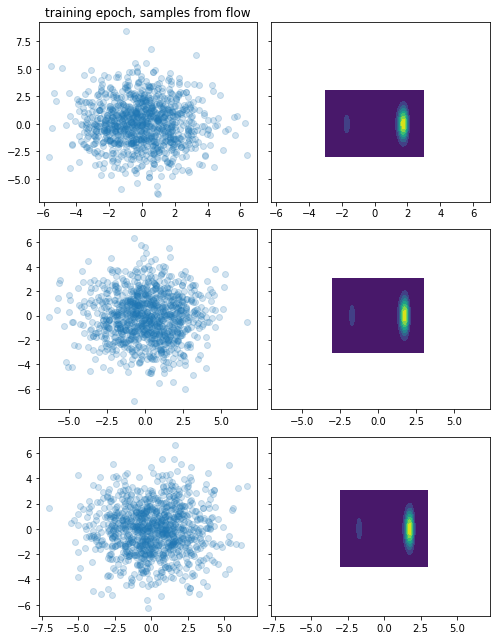

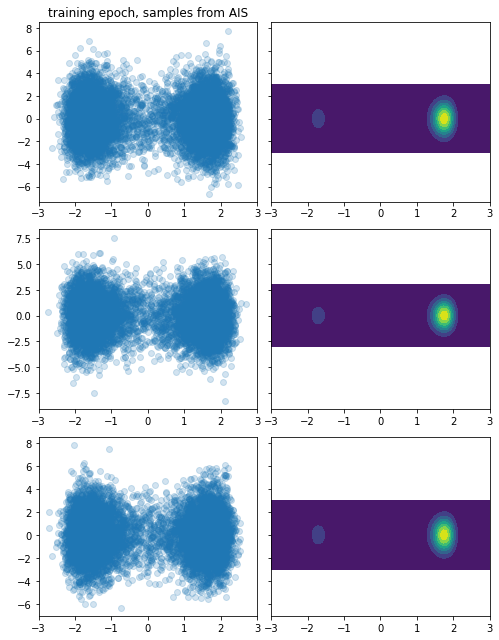

In [12]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])

# Train

In [13]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=20, n_steps_transition_operator=3,
                    step_size=0.5, transition_operator="Metropolis", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-4)

  0%|          | 0/100 [00:00<?, ?it/s]

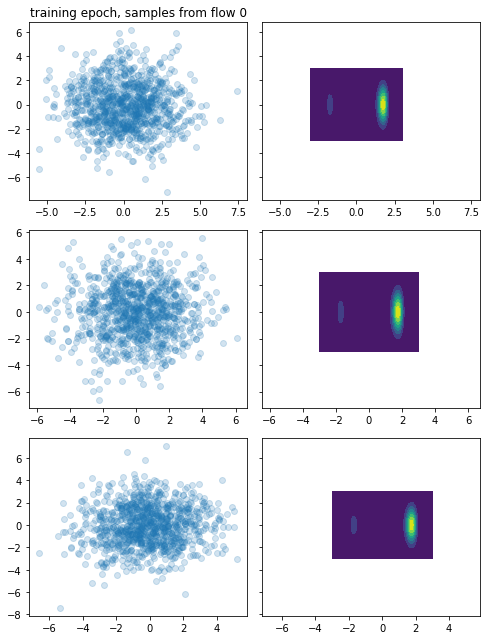

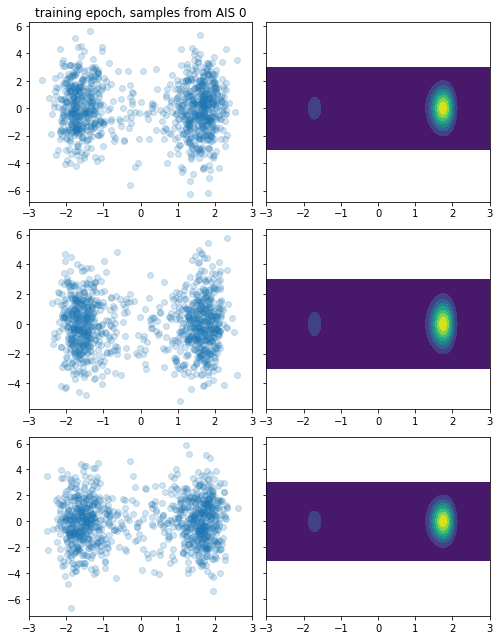

loss: -12.76442099151877,   log_p_x_post_AIS 19.0708610227656, ESS 0.027563185382211672:  25%|██▌       | 25/100 [03:15<09:22,  7.50s/it]   

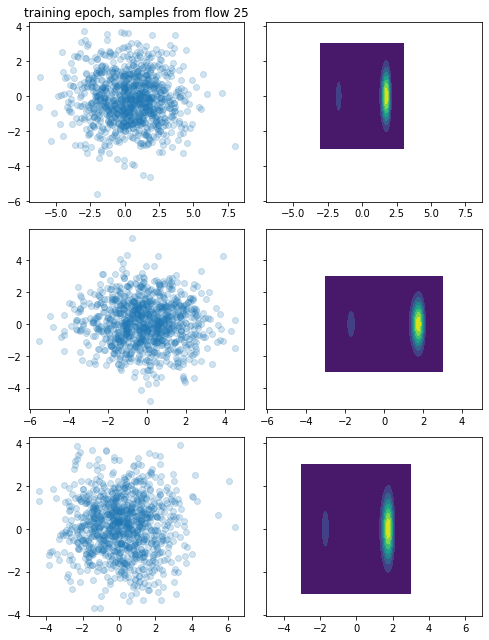

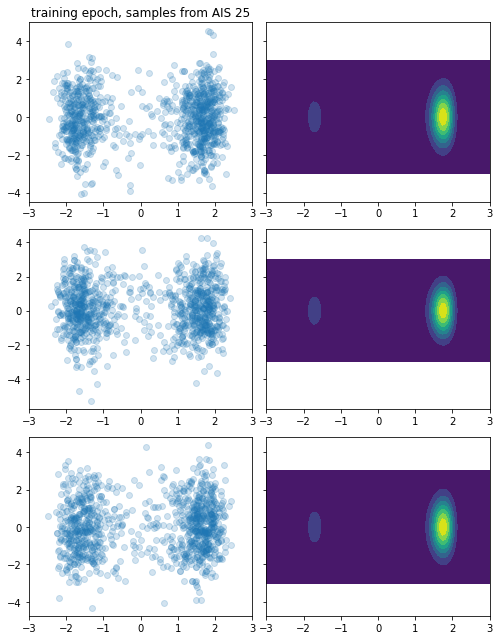

loss: -15.70843182522386,   log_p_x_post_AIS 19.925587592035882, ESS 0.047361517928599974:  50%|█████     | 50/100 [06:17<06:01,  7.24s/it] 

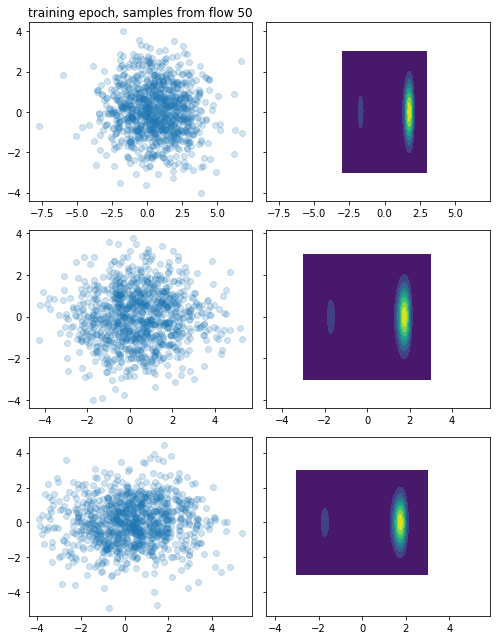

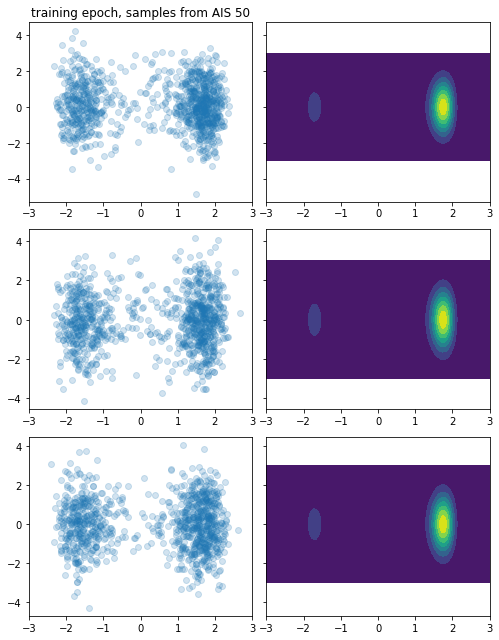

loss: -9.192869627726278,   log_p_x_post_AIS 20.019885039765395, ESS 0.02991914017237795:  75%|███████▌  | 75/100 [09:23<03:03,  7.34s/it]  

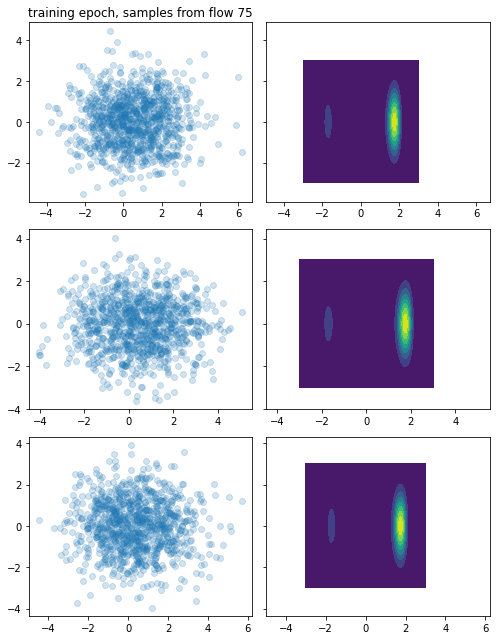

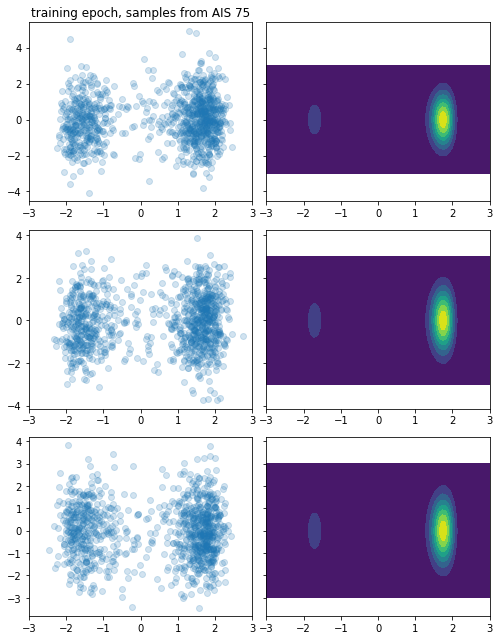

loss: 1.997236636921837,   log_p_x_post_AIS 20.194085654566194, ESS 0.0344663511250794: 100%|██████████| 100/100 [12:22<00:00,  7.42s/it]   


In [14]:
history = tester.train(100, batch_size=int(1e3), intermediate_plots=True, n_plots=4, plotting_func=plotter)

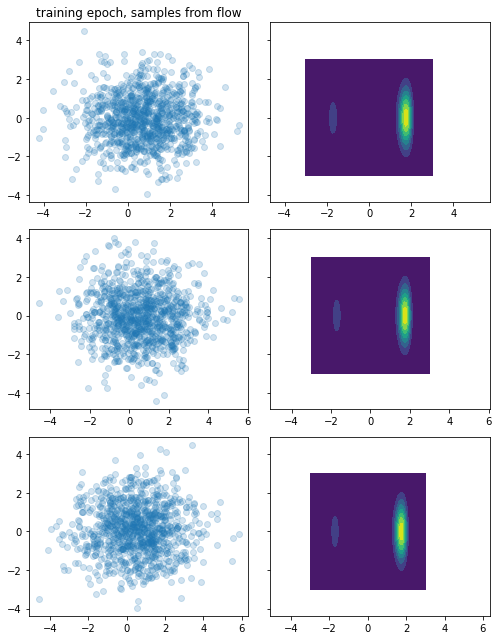

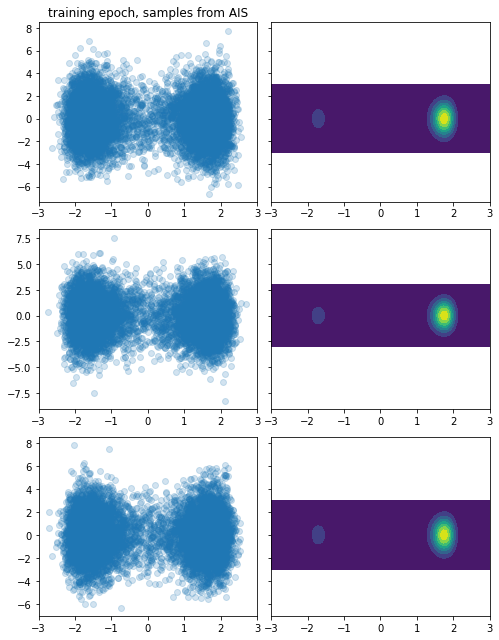

In [15]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])

  0%|          | 0/1000 [00:00<?, ?it/s]

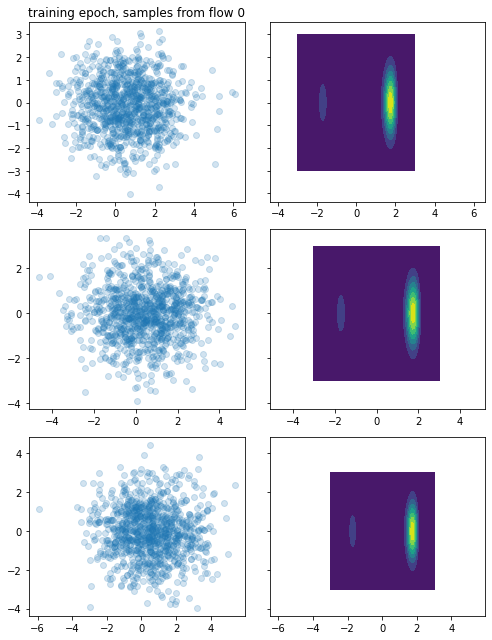

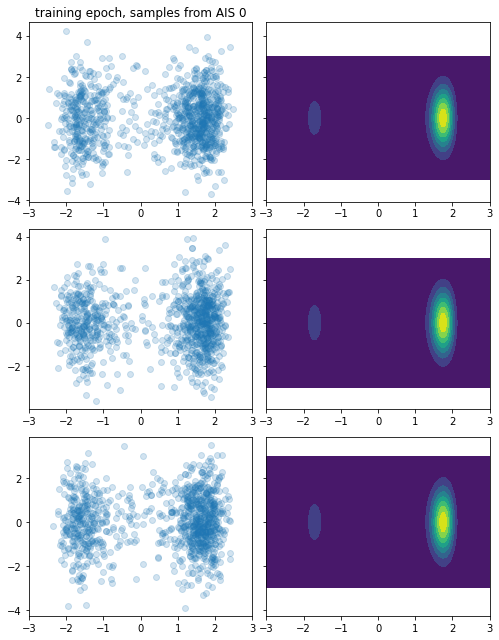

loss: -16.740282810657316,   log_p_x_post_AIS 20.667120992628835, ESS 0.07347096405439672:  25%|██▌       | 250/1000 [27:52<1:25:06,  6.81s/it] 

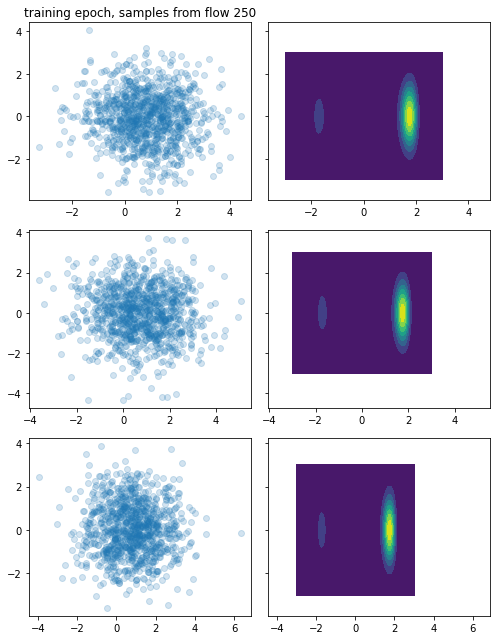

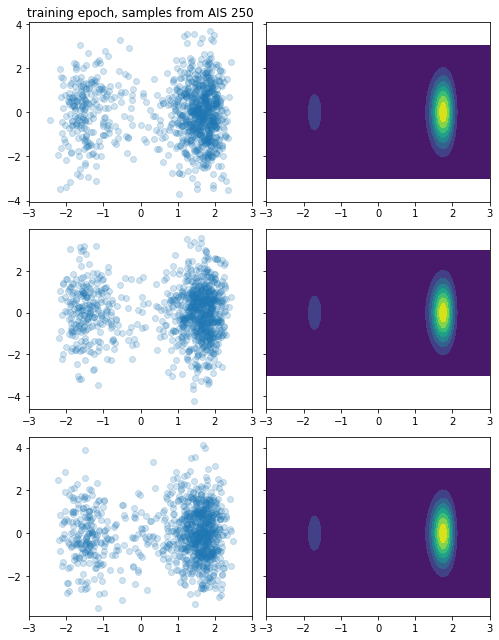

loss: -18.680390853050778,   log_p_x_post_AIS 20.866214977469337, ESS 0.07769912275844222:  50%|█████     | 500/1000 [56:18<54:58,  6.60s/it]  

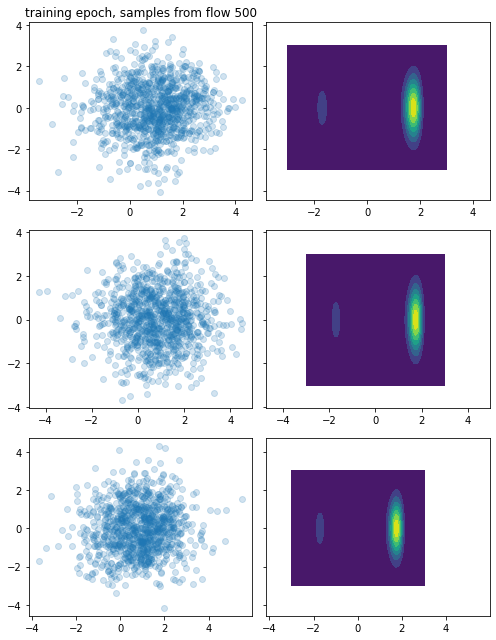

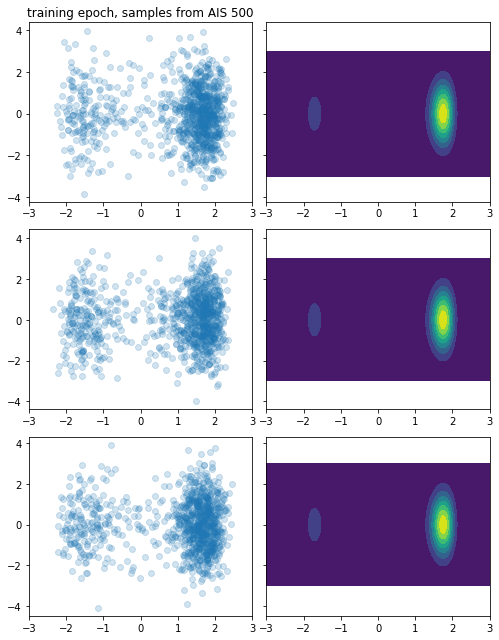

loss: -18.91350035224525,   log_p_x_post_AIS 21.812173954912286, ESS 0.10023270767210268:  72%|███████▏  | 719/1000 [1:20:31<25:32,  5.45s/it] 

The value argument must be within the support


loss: -14.901442188112634,   log_p_x_post_AIS 21.82812051522099, ESS 0.08764941908384842:  73%|███████▎  | 731/1000 [1:21:47<25:16,  5.64s/it]

The value argument must be within the support


loss: -14.901442188112634,   log_p_x_post_AIS 21.82812051522099, ESS 0.08764941908384842:  74%|███████▍  | 738/1000 [1:22:28<22:23,  5.13s/it]

The value argument must be within the support


loss: -16.003576322656652,   log_p_x_post_AIS 21.755170125726124, ESS 0.09181704699765025:  74%|███████▍  | 743/1000 [1:22:56<20:57,  4.89s/it]

The value argument must be within the support


loss: -16.003576322656652,   log_p_x_post_AIS 21.755170125726124, ESS 0.09181704699765025:  74%|███████▍  | 744/1000 [1:22:58<16:51,  3.95s/it]

The value argument must be within the support


loss: -16.003576322656652,   log_p_x_post_AIS 21.755170125726124, ESS 0.09181704699765025:  75%|███████▍  | 748/1000 [1:23:20<19:53,  4.74s/it]

The value argument must be within the support


loss: -7.7178751162695765,   log_p_x_post_AIS 21.769212290333435, ESS 0.08063224406707502:  75%|███████▌  | 750/1000 [1:23:40<23:35,  5.66s/it]

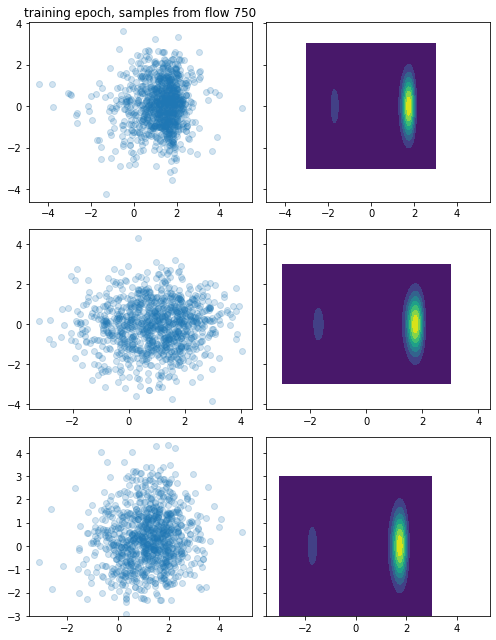

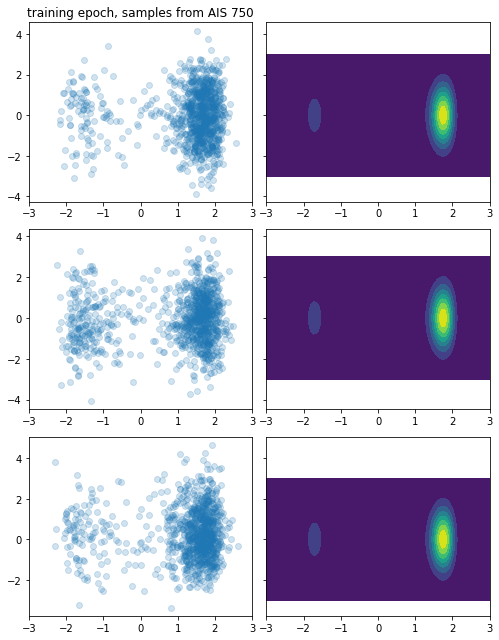

loss: -7.7178751162695765,   log_p_x_post_AIS 21.769212290333435, ESS 0.08063224406707502:  75%|███████▌  | 753/1000 [1:23:52<24:07,  5.86s/it]

The value argument must be within the support


loss: -7.7178751162695765,   log_p_x_post_AIS 21.769212290333435, ESS 0.08063224406707502:  76%|███████▌  | 755/1000 [1:24:03<22:30,  5.51s/it]

The value argument must be within the support


loss: -7.7178751162695765,   log_p_x_post_AIS 21.769212290333435, ESS 0.08063224406707502:  76%|███████▌  | 757/1000 [1:24:13<20:56,  5.17s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  76%|███████▌  | 762/1000 [1:24:44<22:13,  5.60s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  76%|███████▋  | 763/1000 [1:24:45<16:01,  4.06s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  76%|███████▋  | 764/1000 [1:24:45<11:58,  3.05s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  76%|███████▋  | 765/1000 [1:24:47<09:50,  2.51s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  77%|███████▋  | 766/1000 [1:24:47<07:22,  1.89s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  77%|███████▋  | 771/1000 [1:25:15<15:31,  4.07s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  77%|███████▋  | 772/1000 [1:25:16<11:22,  2.99s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  77%|███████▋  | 774/1000 [1:25:22<11:08,  2.96s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  78%|███████▊  | 776/1000 [1:25:31<12:47,  3.43s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  78%|███████▊  | 778/1000 [1:25:41<15:21,  4.15s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  78%|███████▊  | 781/1000 [1:25:58<17:33,  4.81s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  78%|███████▊  | 783/1000 [1:26:06<14:56,  4.13s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  78%|███████▊  | 784/1000 [1:26:08<12:31,  3.48s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  78%|███████▊  | 785/1000 [1:26:09<09:58,  2.78s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  79%|███████▊  | 786/1000 [1:26:12<10:12,  2.86s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  79%|███████▊  | 787/1000 [1:26:16<11:00,  3.10s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  79%|███████▉  | 788/1000 [1:26:16<08:11,  2.32s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  79%|███████▉  | 789/1000 [1:26:17<06:44,  1.92s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  79%|███████▉  | 790/1000 [1:26:18<04:57,  1.42s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  79%|███████▉  | 791/1000 [1:26:19<05:01,  1.44s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  79%|███████▉  | 793/1000 [1:26:29<09:57,  2.89s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  79%|███████▉  | 794/1000 [1:26:29<07:51,  2.29s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  80%|███████▉  | 795/1000 [1:26:32<08:25,  2.47s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  80%|███████▉  | 796/1000 [1:26:36<09:37,  2.83s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  80%|███████▉  | 798/1000 [1:26:45<11:31,  3.42s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  80%|████████  | 800/1000 [1:26:55<13:41,  4.11s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  80%|████████  | 801/1000 [1:26:56<10:16,  3.10s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  80%|████████  | 802/1000 [1:26:56<07:32,  2.29s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  80%|████████  | 803/1000 [1:27:00<08:54,  2.71s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  80%|████████  | 804/1000 [1:27:02<08:24,  2.57s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  80%|████████  | 805/1000 [1:27:04<07:55,  2.44s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  81%|████████  | 806/1000 [1:27:08<09:15,  2.86s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  81%|████████  | 808/1000 [1:27:12<07:07,  2.23s/it]

The value argument must be within the support
The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  81%|████████  | 810/1000 [1:27:21<09:46,  3.09s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  81%|████████  | 811/1000 [1:27:23<08:52,  2.82s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  81%|████████▏ | 813/1000 [1:27:30<09:13,  2.96s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  81%|████████▏ | 814/1000 [1:27:31<07:05,  2.29s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  82%|████████▏ | 815/1000 [1:27:33<07:12,  2.34s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  82%|████████▏ | 816/1000 [1:27:35<06:03,  1.98s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  82%|████████▏ | 817/1000 [1:27:37<06:13,  2.04s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  82%|████████▏ | 818/1000 [1:27:38<05:23,  1.78s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  82%|████████▏ | 819/1000 [1:27:42<07:35,  2.52s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  82%|████████▏ | 820/1000 [1:27:43<05:45,  1.92s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  82%|████████▏ | 821/1000 [1:27:46<06:51,  2.30s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  82%|████████▏ | 823/1000 [1:27:55<09:13,  3.13s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  82%|████████▎ | 825/1000 [1:28:03<09:52,  3.39s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  83%|████████▎ | 826/1000 [1:28:04<07:25,  2.56s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  83%|████████▎ | 827/1000 [1:28:05<06:01,  2.09s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  83%|████████▎ | 828/1000 [1:28:07<06:27,  2.25s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  83%|████████▎ | 829/1000 [1:28:10<06:31,  2.29s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  83%|████████▎ | 830/1000 [1:28:10<04:56,  1.74s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  83%|████████▎ | 831/1000 [1:28:12<04:56,  1.75s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  83%|████████▎ | 832/1000 [1:28:13<04:10,  1.49s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  83%|████████▎ | 834/1000 [1:28:22<07:36,  2.75s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▎ | 835/1000 [1:28:23<06:44,  2.45s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▎ | 836/1000 [1:28:27<07:58,  2.92s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▎ | 837/1000 [1:28:30<07:56,  2.92s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▍ | 838/1000 [1:28:32<07:20,  2.72s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▍ | 839/1000 [1:28:34<06:01,  2.24s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▍ | 840/1000 [1:28:37<06:43,  2.52s/it]

The value argument must be within the support
The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▍ | 842/1000 [1:28:40<05:27,  2.07s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▍ | 843/1000 [1:28:40<04:17,  1.64s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▍ | 844/1000 [1:28:43<05:14,  2.02s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  84%|████████▍ | 845/1000 [1:28:47<06:32,  2.53s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  85%|████████▍ | 846/1000 [1:28:50<06:47,  2.65s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  85%|████████▍ | 847/1000 [1:28:52<06:25,  2.52s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  85%|████████▌ | 850/1000 [1:29:07<09:21,  3.74s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  85%|████████▌ | 851/1000 [1:29:07<06:39,  2.68s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  85%|████████▌ | 852/1000 [1:29:11<07:36,  3.09s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  85%|████████▌ | 854/1000 [1:29:20<08:51,  3.64s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  86%|████████▌ | 855/1000 [1:29:21<06:46,  2.80s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  86%|████████▌ | 856/1000 [1:29:24<06:51,  2.86s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  86%|████████▌ | 857/1000 [1:29:30<08:33,  3.59s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  86%|████████▌ | 858/1000 [1:29:32<07:44,  3.27s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  86%|████████▌ | 859/1000 [1:29:33<06:06,  2.60s/it]

The value argument must be within the support


loss: -11.018170286911872,   log_p_x_post_AIS 21.751285949772186, ESS 0.08231134465464711:  86%|████████▌ | 860/1000 [1:29:37<06:41,  2.87s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  86%|████████▌ | 862/1000 [1:29:44<06:55,  3.01s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  86%|████████▋ | 864/1000 [1:29:51<06:48,  3.00s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  86%|████████▋ | 865/1000 [1:29:54<06:30,  2.89s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  87%|████████▋ | 866/1000 [1:29:54<04:40,  2.10s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  87%|████████▋ | 868/1000 [1:30:01<05:37,  2.55s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  87%|████████▋ | 869/1000 [1:30:06<06:46,  3.10s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  87%|████████▋ | 870/1000 [1:30:09<06:40,  3.08s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  87%|████████▋ | 871/1000 [1:30:10<05:37,  2.62s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  87%|████████▋ | 872/1000 [1:30:10<04:02,  1.89s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  87%|████████▋ | 873/1000 [1:30:11<03:05,  1.46s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  87%|████████▋ | 874/1000 [1:30:11<02:22,  1.13s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 875/1000 [1:30:12<01:57,  1.06it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 876/1000 [1:30:14<02:37,  1.27s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 877/1000 [1:30:15<02:49,  1.38s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 878/1000 [1:30:18<03:41,  1.82s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 879/1000 [1:30:19<03:06,  1.54s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 880/1000 [1:30:21<03:13,  1.61s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 881/1000 [1:30:23<03:22,  1.70s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 882/1000 [1:30:23<02:28,  1.26s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 883/1000 [1:30:25<02:53,  1.48s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  88%|████████▊ | 885/1000 [1:30:35<06:10,  3.22s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  89%|████████▊ | 886/1000 [1:30:37<05:20,  2.82s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  89%|████████▊ | 887/1000 [1:30:38<04:14,  2.25s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  89%|████████▉ | 888/1000 [1:30:39<03:17,  1.76s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  89%|████████▉ | 889/1000 [1:30:43<04:29,  2.43s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  89%|████████▉ | 890/1000 [1:30:43<03:30,  1.91s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  89%|████████▉ | 891/1000 [1:30:44<02:42,  1.49s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  89%|████████▉ | 892/1000 [1:30:45<02:29,  1.38s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  89%|████████▉ | 893/1000 [1:30:47<02:55,  1.64s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  89%|████████▉ | 894/1000 [1:30:50<03:42,  2.10s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  90%|████████▉ | 895/1000 [1:30:52<03:29,  2.00s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  90%|████████▉ | 896/1000 [1:30:56<04:14,  2.45s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  90%|████████▉ | 898/1000 [1:30:58<02:52,  1.69s/it]

The value argument must be within the support
The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  90%|████████▉ | 899/1000 [1:30:59<02:26,  1.45s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  90%|█████████ | 900/1000 [1:31:00<02:09,  1.30s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  90%|█████████ | 901/1000 [1:31:02<02:51,  1.73s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  90%|█████████ | 903/1000 [1:31:09<03:45,  2.32s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  90%|█████████ | 904/1000 [1:31:11<03:26,  2.15s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  91%|█████████ | 907/1000 [1:31:26<05:44,  3.71s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  91%|█████████ | 908/1000 [1:31:30<05:43,  3.74s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  91%|█████████ | 909/1000 [1:31:30<04:05,  2.70s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  91%|█████████ | 910/1000 [1:31:33<03:57,  2.64s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  91%|█████████ | 911/1000 [1:31:36<04:20,  2.93s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  91%|█████████ | 912/1000 [1:31:37<03:20,  2.27s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  91%|█████████▏| 913/1000 [1:31:37<02:23,  1.65s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  91%|█████████▏| 914/1000 [1:31:38<01:46,  1.24s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▏| 916/1000 [1:31:39<01:07,  1.25it/s]

The value argument must be within the support
The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▏| 917/1000 [1:31:39<01:08,  1.21it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▏| 918/1000 [1:31:42<01:56,  1.42s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▏| 919/1000 [1:31:43<01:36,  1.19s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▏| 920/1000 [1:31:47<02:46,  2.08s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▏| 921/1000 [1:31:50<03:02,  2.31s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▏| 922/1000 [1:31:52<02:49,  2.18s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▏| 923/1000 [1:31:53<02:26,  1.90s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▏| 924/1000 [1:31:57<03:19,  2.63s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  92%|█████████▎| 925/1000 [1:31:58<02:24,  1.92s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  93%|█████████▎| 927/1000 [1:31:59<01:30,  1.24s/it]

The value argument must be within the support
The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  93%|█████████▎| 928/1000 [1:32:01<01:43,  1.44s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  93%|█████████▎| 929/1000 [1:32:02<01:26,  1.22s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  93%|█████████▎| 930/1000 [1:32:02<01:10,  1.01s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  93%|█████████▎| 931/1000 [1:32:05<01:51,  1.62s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  93%|█████████▎| 933/1000 [1:32:15<03:22,  3.02s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▎| 935/1000 [1:32:17<02:14,  2.07s/it]

The value argument must be within the support
The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▎| 936/1000 [1:32:18<01:42,  1.61s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▎| 937/1000 [1:32:19<01:34,  1.50s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▍| 938/1000 [1:32:20<01:17,  1.25s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▍| 939/1000 [1:32:23<01:49,  1.80s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▍| 940/1000 [1:32:23<01:19,  1.32s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▍| 941/1000 [1:32:24<01:15,  1.28s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▍| 942/1000 [1:32:25<01:00,  1.04s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▍| 943/1000 [1:32:27<01:25,  1.50s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▍| 944/1000 [1:32:30<01:38,  1.76s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  94%|█████████▍| 945/1000 [1:32:31<01:31,  1.67s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  95%|█████████▍| 946/1000 [1:32:32<01:11,  1.33s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  95%|█████████▍| 947/1000 [1:32:34<01:29,  1.69s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  95%|█████████▍| 948/1000 [1:32:35<01:15,  1.45s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  95%|█████████▍| 949/1000 [1:32:37<01:26,  1.70s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  95%|█████████▌| 950/1000 [1:32:40<01:45,  2.10s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  95%|█████████▌| 951/1000 [1:32:41<01:26,  1.76s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  95%|█████████▌| 952/1000 [1:32:42<01:10,  1.48s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  95%|█████████▌| 953/1000 [1:32:43<01:01,  1.31s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  95%|█████████▌| 954/1000 [1:32:46<01:19,  1.74s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▌| 955/1000 [1:32:46<01:00,  1.34s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▌| 956/1000 [1:32:47<00:46,  1.05s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▌| 957/1000 [1:32:47<00:40,  1.05it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▌| 958/1000 [1:32:48<00:34,  1.22it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▌| 959/1000 [1:32:48<00:28,  1.44it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▌| 960/1000 [1:32:49<00:30,  1.30it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▌| 961/1000 [1:32:50<00:31,  1.23it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▌| 962/1000 [1:32:51<00:29,  1.31it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▋| 963/1000 [1:32:51<00:26,  1.37it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▋| 964/1000 [1:32:53<00:36,  1.02s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  96%|█████████▋| 965/1000 [1:32:53<00:27,  1.29it/s]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  97%|█████████▋| 968/1000 [1:33:03<01:02,  1.95s/it]

The value argument must be within the support
The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  97%|█████████▋| 969/1000 [1:33:04<00:46,  1.49s/it]

The value argument must be within the support


loss: -11.293607654066077,   log_p_x_post_AIS 21.629779546202602, ESS 0.08965956832884169:  97%|█████████▋| 970/1000 [1:33:06<00:47,  1.57s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  97%|█████████▋| 972/1000 [1:33:15<01:20,  2.89s/it] 

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  97%|█████████▋| 973/1000 [1:33:15<00:58,  2.16s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  97%|█████████▋| 974/1000 [1:33:16<00:42,  1.63s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  98%|█████████▊| 975/1000 [1:33:16<00:32,  1.28s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  98%|█████████▊| 976/1000 [1:33:17<00:30,  1.27s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  98%|█████████▊| 977/1000 [1:33:19<00:33,  1.43s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  98%|█████████▊| 979/1000 [1:33:20<00:18,  1.11it/s]

The value argument must be within the support
The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  98%|█████████▊| 981/1000 [1:33:29<00:46,  2.43s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  98%|█████████▊| 982/1000 [1:33:29<00:34,  1.90s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  98%|█████████▊| 983/1000 [1:33:30<00:27,  1.63s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  98%|█████████▊| 985/1000 [1:33:32<00:17,  1.15s/it]

The value argument must be within the support
The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  99%|█████████▊| 986/1000 [1:33:33<00:15,  1.08s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  99%|█████████▊| 987/1000 [1:33:36<00:22,  1.72s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  99%|█████████▉| 988/1000 [1:33:37<00:19,  1.61s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  99%|█████████▉| 989/1000 [1:33:38<00:14,  1.29s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  99%|█████████▉| 990/1000 [1:33:41<00:18,  1.89s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  99%|█████████▉| 991/1000 [1:33:42<00:13,  1.54s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  99%|█████████▉| 992/1000 [1:33:44<00:12,  1.62s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  99%|█████████▉| 993/1000 [1:33:45<00:10,  1.43s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227:  99%|█████████▉| 994/1000 [1:33:45<00:07,  1.20s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227: 100%|█████████▉| 995/1000 [1:33:46<00:05,  1.09s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227: 100%|█████████▉| 996/1000 [1:33:47<00:04,  1.12s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227: 100%|█████████▉| 997/1000 [1:33:49<00:03,  1.14s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227: 100%|█████████▉| 998/1000 [1:33:49<00:02,  1.02s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227: 100%|█████████▉| 999/1000 [1:33:52<00:01,  1.38s/it]

The value argument must be within the support


loss: -19.13159926696236,   log_p_x_post_AIS 21.827671794911122, ESS 0.10672154241070227: 100%|██████████| 1000/1000 [1:33:52<00:00,  5.63s/it]

The value argument must be within the support


In [16]:
history = tester.train(1000, batch_size=int(1e3), intermediate_plots=True, n_plots=4, plotting_func=plotter)

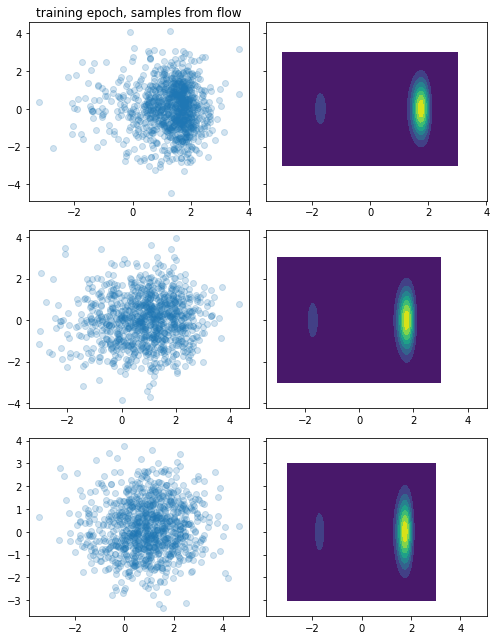

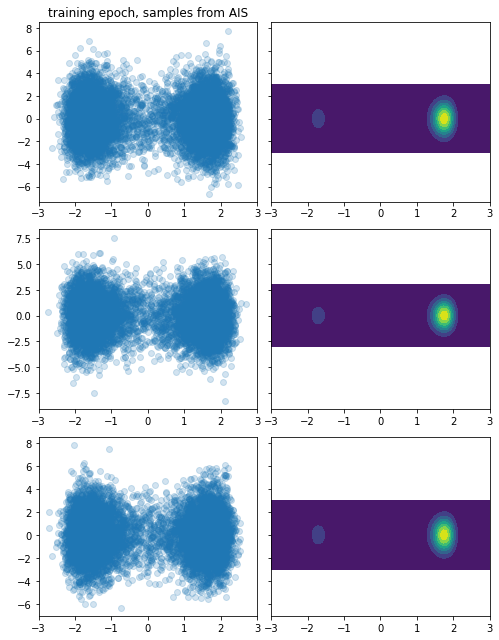

In [17]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])